FileNotFoundError: [Errno 2] No such file or directory: '../figures/dist_by_year/hist_2005.png'

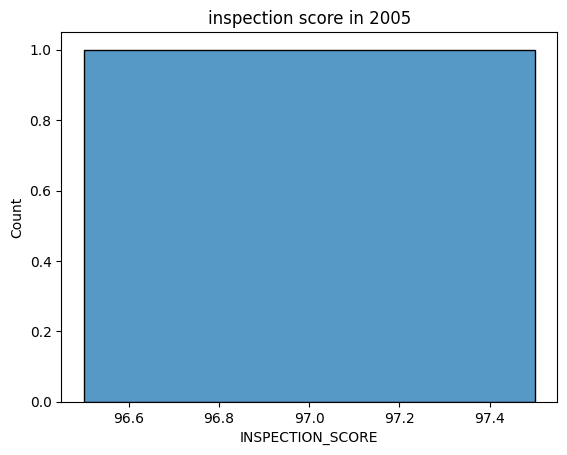

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express 
import matplotlib.pyplot as plt
import csv
import os

#number of decimals to keep
NUM_DECIMAL = 2

#header for year
HEADER_YEAR = ['year', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

#header for state
HEADER_STATE = ['state', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']


if __name__ == '__main__':
    #read the dataset
    df = pd.read_csv('../data/locations_inspectionscores_forMeri_Nov.csv')
    
    #inspection score data
    inspection_score = df['INSPECTION_SCORE']
    
    #statistic CSV table -- by year
    stat_file = open('../figures/stats_inspection_score_year.csv', 'w') 
    
    stat_writer = csv.writer(stat_file)
    
    stat_writer.writerow(HEADER_YEAR)

    #overall inspection score statistics
    stats = inspection_score.describe().round(NUM_DECIMAL).to_list()
    
    stats.insert(0, 'overall')
    
    stat_writer.writerow(stats)

    #get all available years and get them sorted
    all_years = sorted(list(set(df['inspection_year'].astype(np.int32))))

    #each-year inspection score statistics
    for yr in all_years:
        inspection_score_each = df.loc[df['inspection_year'] == yr]['INSPECTION_SCORE']
        
        stats_each = inspection_score_each.describe().round(NUM_DECIMAL).to_list()
        
        stats_each.insert(0, yr)
        
        stat_writer.writerow(stats_each)
    
    #close the file
    stat_file.close()

    #get all available states and get them sorted
    all_states = sorted(list(set(df['STATE_NAME.x'])))

    #statistic CSV table -- by state
    stat_file = open('../figures/stats_inspection_score_state.csv', 'w') 
    
    stat_writer = csv.writer(stat_file)
    
    stat_writer.writerow(HEADER_STATE)

    #each-state inspection score statistics
    for st in all_states:
        inspection_score_each = df.loc[df['STATE_NAME.x'] == st]['INSPECTION_SCORE']

        stats_each = inspection_score_each.describe().round(NUM_DECIMAL).to_list()
        
        stats_each.insert(0, st)
        
        stat_writer.writerow(stats_each)
    
    stat_file.close()

    #histograms of inspection scores with each individual year
    i = 0
    for yr in all_years:
        inspection_score_each = df.loc[df['inspection_year'] == yr]['INSPECTION_SCORE']
        plt.figure(f'{i}')
        sns.histplot(inspection_score_each)
        plt.title(f'inspection score in {yr}')
        plt.savefig(f'../figures/dist_by_year/hist_{yr}.png')
        i += 1

    #inspection scores changed over years
    mean_years = pd.DataFrame()
    for yr in all_years:
        inspection_score_each = df.loc[df['inspection_year'] == yr]['INSPECTION_SCORE']
        another_year = pd.DataFrame({f'{yr}': [inspection_score_each.mean()]})
        mean_years = pd.concat([mean_years, another_year], axis=1)

    plt.figure(f'{i}')
    plt.plot(mean_years.columns.to_list(), mean_years.iloc[0, ])
    plt.xlabel('time in years')
    plt.ylabel('inspection score')
    plt.savefig('../figures/dist_by_year/all.png')